# Homework 1

Consider the `wine` dataset, the response measures wine quality and takes discrete values between 3 and 8. The input contains various measurable attributes for each wine (e.g. sulphates, acidity). The goal of this exercise is to predict wine quality category based on those attributes. In addition to `numpy` and `pandas`, we will use functions in the `sklearn` and `pygam` modules.

In [1]:
# Modules
import numpy as np
import pandas as pd
import pygam

from matplotlib import pyplot as plt
from sklearn import datasets, linear_model, metrics, model_selection, pipeline, preprocessing, utils

### Q1

1. Load the Wine dataset and examine the size of the dataset, the variable types, and produce some descriptive statistics.

In [2]:
# Loads dataset
X = pd.read_csv('wine_data.csv', index_col=0)
y = pd.read_csv('wine_target.csv', index_col=0)

In [3]:
X.describe()
# Quick comment:
# All the variables are numeric variables.
# There are 1599 observations in the wine data.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


### Q2

2. For simplicity, we will recode the response as 0 for wines that have a score below or equal to 5 and 1 otherwise. Plot the distribution of the response.

In [4]:
# Apply boolean mask to generate a new column split target responses into 0,1
y.loc[y['quality']<=5,'quality_dummy']=0
y.loc[y['quality']>5,'quality_dummy']=1
# del y['quality']

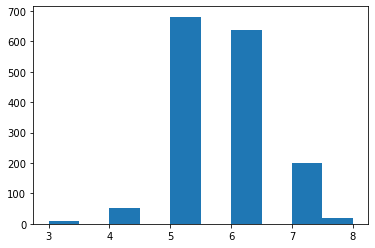

In [5]:
# Plot the distribution of the original response
plt.hist(y['quality']);

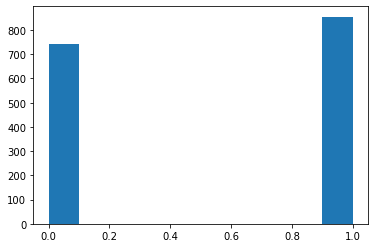

In [6]:
# Plot the distribution of the transformed response
plt.hist(y['quality_dummy']);

### Q3

3. Split the data into a training (75%) and a test (25%) sample, while mainting the class proportions in the training and the test samples (see `sklearn.model_selection`). Remember to make the sampling reproductible.

In [7]:
# Setting a fixed seed for the random_state param to make samping procedure reproductible
del y['quality']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=.75, test_size=.25,
                                                                    shuffle=True, random_state=1)

In [8]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1144,7.3,0.320,0.23,2.3,0.066,35.0,70.0,0.99588,3.43,0.62,10.1
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.2
446,12.5,0.380,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5
399,8.7,0.765,0.22,2.3,0.064,9.0,42.0,0.99630,3.10,0.55,9.4
647,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0


In [9]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
75,8.8,0.41,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5
1283,8.7,0.63,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2
408,10.4,0.34,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3
1281,7.1,0.46,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4
1118,7.1,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3


In [10]:
y_train.head()

,quality_dummy
1144,0.0
73,0.0
446,0.0
399,0.0
647,0.0


In [11]:
y_test.head()

,quality_dummy
75,0.0
1283,1.0
408,1.0
1281,1.0
1118,1.0


### Q4

4. Fit a logistic regression model to the training data and evaluate its performance on the test data (see `sklearn.linear_model`). Set the number of optimisation iterations `max_iter=10000` for the model to converge.

#### Model Initialization

In [12]:
# create an instance of logistic regression
lgstc_reg =  linear_model.LogisticRegression(solver='newton-cg',max_iter=10000)    

# fit training data on logistic regression 
lgstc_reg.fit(X_train, y_train['quality_dummy'])

# print coefficients
print(lgstc_reg.intercept_, lgstc_reg.coef_)

[-8.53370417] [[ 0.09421995 -2.68224251 -0.76481734  0.02654355 -0.74955481  0.02414511
  -0.01777728 -0.01467997 -0.21462295  1.83882445  0.91584318]]


#### Performance Evaluation

In [13]:
# importing additional evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,f1_score

# In-sample prediction
y_train_pred=lgstc_reg.predict(X_train)
# Out-sample prediction
y_test_pred = lgstc_reg.predict(X_test)

# Store evaluation scores
ac_s = accuracy_score(y_test, y_test_pred)
rec_s = recall_score(y_test,y_test_pred)
prec_s = precision_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)

# Put into dataframe for testing set 
results_Test=pd.DataFrame({
    "Accuracy":ac_s,
    "Recall":rec_s,
    "Precision":prec_s,
    "F1_score":f1
},index=['Test_Evaluation_Metrics'])

results_Test

,Accuracy,Recall,Precision,F1_score
Test_Evaluation_Metrics,0.7375,0.716981,0.771574,0.743276


AUC for logistic regression model:  0.8223604977920513


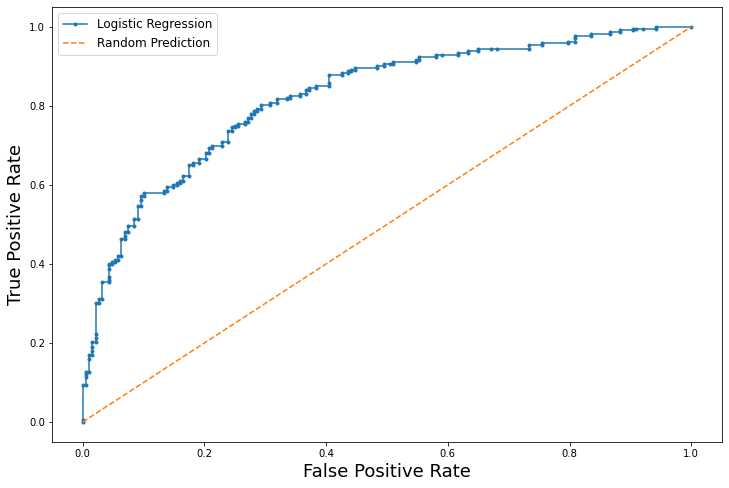

In [14]:
#  Predicted success prob
lr_prob = lgstc_reg.predict_proba(X_test)
lr_prob = lr_prob[:,1]

# Compute AUC score for the test data
lr_auc=metrics.roc_auc_score(y_test,lr_prob)
lr_fpr,lr_tpr,_=metrics.roc_curve(y_test,lr_prob)

# Random Pred Model as floor
ns_prob=[0 for _ in range(len(y_test))] # a "dummy" model: predict outcome 0, regardless.
ns_auc=metrics.roc_auc_score(y_test,ns_prob) # compute AUC score for random model
ns_fpr,ns_tpr,_=metrics.roc_curve(y_test,ns_prob) # ROC curve for random model


print("AUC for logistic regression model: ",lr_auc)
plt.figure(figsize=(12,8))
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Prediction')


plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.legend(fontsize=12)
plt.show()

#### Comment on the performance 

This section only evaluates the test performance, since the issue of overfit is dicussed in Q6.

Based on all 4 evaluation metrics (accuracy, recall, percision, f1) listed in the results_Test dataframe, it can be concluded that the logistic model has a decent performance. For example, an accuracy score of 0.7375 on the test data means that the model accurately predicts 73.75% of the cases in the test data. 

In addition, ROC was plotted and AUC was computed to gauge the performance of this model. The orange dotted line shows the model performance of a constant prediction model, while the blue line shows the logistic regression. The logisitic regression has an AUC value of 0.82 suggests the model has decent predictive power. 

### Q5

5. Compute the bootstrapped standard errors for the parameters using 100 bootstrap of size 500 (see `sklearn.utils`). Provide an interpretation for one of the parameter estimates.

In [15]:
# bootstrap SE

np.random.seed(1)
# Since y was DF, convert to series to obtain 1D array
y_bs = pd.Series(y['quality_dummy'])

nb=100
# Bootstrap 500 times
# Initialize an an array to store coef estimates for each BS, array shape = (# of bs iterations, # of features)
bh_bootstrap = np.zeros((nb, X.shape[1]))

# Perform the bootstrap procedure using for loop, where each iteration, a random sample is drawn, stored, then replaced 
for i in range(nb):
    X_sample, y_sample = utils.resample(X, y_bs, replace=False, n_samples=500)
    lgstc_reg.fit(X_sample, y_sample) 
    bh_bootstrap[i] = lgstc_reg.coef_

# Compute the SE using formula given in the slides
se_numerator = np.sum((bh_bootstrap -np.mean(bh_bootstrap,axis=0))**2,axis=0)
se_bs=np.sqrt(se_numerator/(nb-1)).round(4)
se_bs

array([0.0672, 0.3696, 0.399 , 0.0752, 0.3194, 0.0109, 0.0044, 0.0059,
       0.3717, 0.3307, 0.1092])

fixed acidity           0.085387
volatile acidity       -2.194440
citric acid            -0.352342
residual sugar          0.008594
chlorides              -0.475194
free sulfur dioxide     0.026949
total sulfur dioxide   -0.017432
density                -0.004531
pH                     -0.222069
sulphates               1.683258
alcohol                 0.929569
dtype: float64

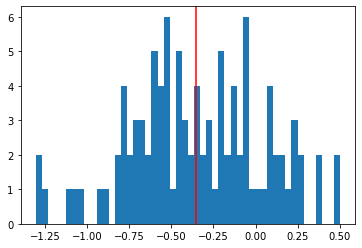

In [16]:
# Save 100 iterations into dataframe 
bh_bootstrap = pd.DataFrame(bh_bootstrap, columns=X.columns)

# Plot one of the features and provide interpretation
plt.hist(bh_bootstrap['citric acid'], bins=50)
plt.axvline(x=np.mean(bh_bootstrap['citric acid']), color='red')

bh_bootstrap.mean()

#### Interpretation

The coefficient on **'citric acid'** is **-0.327007**.It is **negative**. As 'citric acid' is a numeric variable, the interpretation is that all else being equal, the higher the citric acid level, the less likelihood the wine quality will turn out to be greater than 5.

### Q6

6. Show whether the model overfits the training data.

In [17]:
# Create a row for train evaluation metrics

ac_s_train = accuracy_score(y_train, y_train_pred)
rec_s_train = recall_score(y_train,y_train_pred)
prec_s_train = precision_score(y_train,y_train_pred)
f1_train = f1_score(y_train,y_train_pred)

results_Train=pd.DataFrame({
    "Accuracy":ac_s_train,
    "Recall":rec_s_train,
    "Precision":prec_s_train,
    "F1_score":f1_train
},index=['Train_Evaluation_Metrics'])

In [18]:
results_Train

,Accuracy,Recall,Precision,F1_score
Train_Evaluation_Metrics,0.748957,0.752722,0.773163,0.762805


In [19]:
results_Test

,Accuracy,Recall,Precision,F1_score
Test_Evaluation_Metrics,0.7375,0.716981,0.771574,0.743276


#### Comment

Here, the results_Train & results_Test DFs store the accuracy, recall, precision, and F1 score of the training and testing dataset, accordingly. All 4 criteria declined slightly when switching from training to testing data. One can argue that the model overfits slightly, as the model captures unnecessary noise from the training data as opposed to the general pattern of the overall data; However, in our group's opinion, we think the decreases across scores are relatively small, and that overfitting is not a significant concern for this model.

### Q7

7. Estimate the prediction accuracy using 5-fold cross-validation (see `sklearn.model_selection`). How does this statistic compare to the test error?


In [20]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
kf= 5
results = model_selection.cross_validate(lgstc_reg, X, y['quality_dummy'], cv=kf, scoring=scoring)


print("Accuracy:", np.mean(results['test_accuracy']))
print("Precision:",np.mean(results['test_precision']))
print("Recall:",np.mean(results['test_recall']))
print("F1-score:", np.mean(results['test_f1']))

Accuracy: 0.7310932601880877
Precision: 0.7593371674035517
Recall: 0.7391812865497076
F1-score: 0.7423742830285938


#### Comment 

The above returned scores show the average scores across 5-fold CV. The average accuracy score is 0.731. The test error is calculated as 1- accuracy for the test data, or 1 - 0.7375 = 0.2625. We can see the accuracy score is slightly lower for the 5-fold CV. 

### Q8

8. Compute the confusion matrix for the test sample (see sklearn.metrics). Comment on the performance of the model.

In [21]:
cm = metrics.confusion_matrix(y_test,y_test_pred)
cm

array([[143,  45],
       [ 60, 152]], dtype=int64)

In [22]:
cm_in_pct = cm/len(y_test_pred)*100
cm_in_pct

array([[35.75, 11.25],
       [15.  , 38.  ]])

In [23]:
# True Negative
TN =cm[0][0] #TN
# False Positive
FP = cm[0][1] #type 1 error
# False Negative
FN = cm[1][0] #type 2 error
#True Positive
TP=cm[1][1] #TP

TNR = TN/(FP+TN) 
TPR = TP/(FN+TP) # also recall score
FPR = FP/(FP+TN)

results_Test['TNR']=TNR
results_Test['TPR']=TPR
results_Test['FPR']=FPR

In [24]:
results_Test

,Accuracy,Recall,Precision,F1_score,TNR,TPR,FPR
Test_Evaluation_Metrics,0.7375,0.716981,0.771574,0.743276,0.760638,0.716981,0.239362


#### Comment

The confusion matrix captures the type 1 and type 2 error trade-offs, and it can be used in conjunction with other evaluation matrics to gauge the performance of the model. 

TNR measures the actual negative cases correctly classified by the model. The model has a TNR of approximately 0.76.

TPR, or recall score, measure the actual positive cases correctly classified by the model. The model has a TPR of approximately 0.72.

FPR measures the % of FP, or the acutal negative cases being incorrectly classified as positive by the model. The model has a FPR of approximately 0.24.

Overall, the TNR and TPR of the model is relatively good, and the FPR is considered to be reasonable. Thus, the confusion matrix and the relevant metrics computed using confusion matrix suggest the model has a decent performance.

### Q9

9. Using the `pygam` module, fit a Generalised Linear Model for classification. Compute the training and test accuracy of the GAM model (see `sklearn.metrics`). Comment on the results.

In [25]:
# Fit logistic GAM using pygam
gam_model=pygam.LogisticGAM().fit(X_train,y_train)

# Make in-sample and testing dataset predictions
y_gam_train_pred = gam_model.predict(X_train)
y_gam_test_pred = gam_model.predict(X_test)

# Compute training and testing dataset accuracy of the LogisticGAM model
gam_train_accuracy= metrics.accuracy_score(y_train,y_gam_train_pred) 
gam_test_accuracy = metrics.accuracy_score(y_test,y_gam_test_pred)

In [26]:
print(f"Training dataset accuracy for unregulated logistic model: \033[1m{gam_train_accuracy:.4f}\033[0m; Testing dataset accuracy for unregulated logistic model: \033[1m{gam_test_accuracy:.4f}\033[0m.")

Training dataset accuracy for unregulated logistic model: 0.7998; Testing dataset accuracy for unregulated logistic model: 0.7325.


#### Comment

The Pygam fitted Logistic model has a similar accuracy score in the testing set  to the sklearn fitted logisitic model; However, accuracy of the training score is considerably higher than the sklearn fitted logisitic model. One potential explaination is that the sklearn model incorporates regulariziation as default when fitting the model. Therefore, the sklearn logisitic model was not subject to overfit. Whereas, in case of the logisitic model fitted using Pygam, the training vs. testing accuracy score changed quite a bit, and it is reasonable to say the model is somewhat overfitted.

### Q10

10. Use grid-search to find a good value for the regularisation parameters (see the `gridsearch` method of the model). Could you improve on the previous fit?

#### Additional Clarification

For Q10, I have used the first 2 methods presented in the Pygam documentation, the first method is a simple gridsearch, while the second method is a more complicated version, and it takes longer to converge. Upon examining the lambda values given by both methods, they return very similar value of approximately 3.05, so here I kept the second approach which slightly improves the test accuracy score.

In [27]:
# Standard Method #1

# reg_gam_model=pygam.LogisticGAM().fit(X_train,y_train)
# lam = np.logspace(-3,3,11)
# reg_gam_model.gridsearch(X_train,y_train,lam=lam,keep_best=True,progress=False,return_scores=True)

In [28]:
reg_gam_model=pygam.LogisticGAM().fit(X_train,y_train)
lams = np.exp(np.random.random((50, 11)) * 6 - 3)
reg_gam_model.gridsearch(X_train,y_train,lam=lams,keep_best=True,progress=True,return_scores=True)#return_scores=True

 48% (24 of 50) |###########             | Elapsed Time: 0:00:18 ETA:   0:03:19

did not converge


100% (50 of 50) |########################| Elapsed Time: 0:00:30 Time:  0:00:30


OrderedDict([(LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
                 fit_intercept=True, max_iter=100, 
                 terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + intercept,
                 tol=0.0001, verbose=False),
              3.045683158939055),
             (LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
                 fit_intercept=True, max_iter=100, 
                 terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + intercept,
                 tol=0.0001, verbose=False),
              3.0502550704057945),
             (LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
                 fit_intercept=True, max_iter=100, 
                 terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + intercept,
                 tol=0.0001, verbose=False),
              3.051537646917108),
             (LogisticGAM(callbacks=[Deviance(), Diffs

In [29]:
# Make in-sample and testing dataset predictions
# For 11 lambda value grid search
reg_y_gam_train_pred = reg_gam_model.predict(X_train)
reg_y_gam_test_pred = reg_gam_model.predict(X_test)

# Compute training and testing dataset accuracy of the LogisticGAM model
reg_gam_train_accuracy= metrics.accuracy_score(y_train,reg_y_gam_train_pred) 
reg_gam_test_accuracy = metrics.accuracy_score(y_test,reg_y_gam_test_pred)

In [30]:
print(f"Training dataset accuracy for regulated logistic model: \033[1m{reg_gam_train_accuracy:.4f}\033[0m; Testing dataset accuracy for regulated logistic model: \033[1m{reg_gam_test_accuracy:.4f}\033[0m.")

Training dataset accuracy for regulated logistic model: 0.7998; Testing dataset accuracy for regulated logistic model: 0.7425.


#### Comment

Comparing the LogisitcGAM model for regulated and unregulated cases, the training data accuracy score between these models did not change, while the accuracy score on the testing dataset improved slightly from 0.725 to 0.7425 for the regulated logistic model. The result shows modest improvements on the testing data accuracy.

### Q11

11. Display the partial dependence plots for each variable.

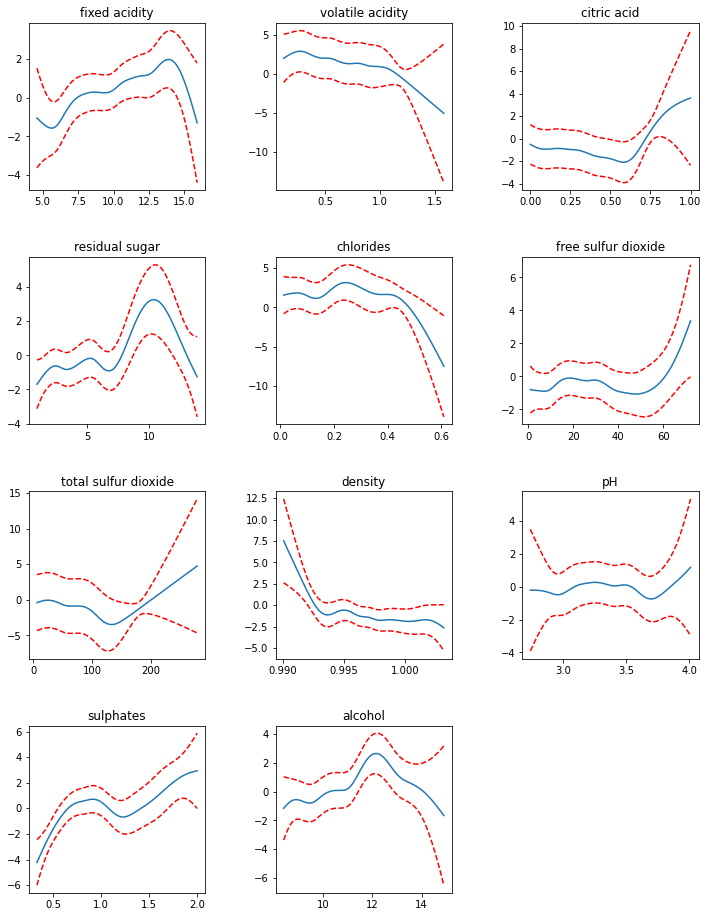

In [31]:
pdp_titles = X.columns.tolist()

num_cols = 3
num_rows = (len(pdp_titles) + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Adjusting for the subplots config to make plots more presentable
for i, ax in enumerate(axs.flat):
    if i < len(pdp_titles):
        # Switch to reg_gam_model (regulated) from gam_model (unregulated) as discussed in Piazza
        XX = reg_gam_model.generate_X_grid(term=i)
        pdep, confi = gam_model.partial_dependence(term=i, width=0.95)
        ax.plot(XX[:, i], pdep)
        ax.plot(XX[:, i], confi, c='r', ls='--')
        ax.set_title(pdp_titles[i])

# Remove empty subplots
if len(pdp_titles) < num_rows * num_cols:
    for ax in axs.flat[len(pdp_titles):]:
        ax.set_visible(False)